<a href="https://colab.research.google.com/github/s34836/WUM/blob/main/Lab_15_Language_Models_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language models
## Embeddings - example

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 31.2 MB/s eta 0:00:00


In [2]:
import gensim.downloader

glove_vectors = gensim.downloader.load('glove-twitter-25')


[==================================================] 100.0% 104.8/104.8MB downloaded


In [3]:
words = ['king', 'queen', 'man', 'woman']
embeddings = glove_vectors[words]

In [4]:
from sklearn.preprocessing import normalize
embeddings = normalize(embeddings, axis=1)
similarity_matrix = embeddings @ embeddings.T

<Axes: >

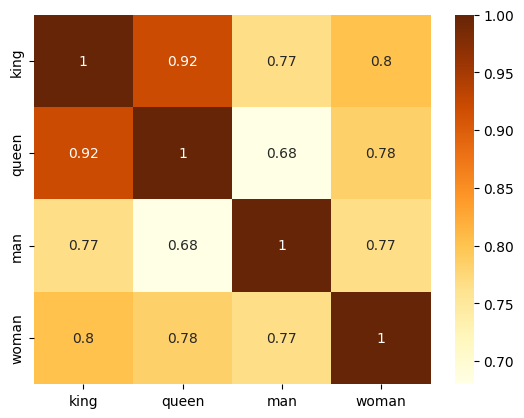

In [5]:
import seaborn as sns
sns.heatmap(similarity_matrix, annot=True, yticklabels=words, xticklabels=words, cmap="YlOrBr")

In [6]:
king = embeddings[0]
queen = embeddings[1]
man = embeddings[2]
woman = embeddings[3]

similarity_score = (king - man + woman).dot(queen)
print(f"Similarity score between 'king - man + woman' and 'queen': {similarity_score}")

Similarity score between 'king - man + woman' and 'queen': 1.024725317955017


## Attention - example

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

In [7]:
import numpy as np
words = ["massive", "elephant", "and", "tiny", "mouse"]
embeddings = np.array([
       [ 1. ,  1. ,  0.5, -0.5], # massive
       [ 1. ,  1. , -0.5,  0.5], # elephant
       [ 0. ,  0. ,  0. , -0.5], # and
       [-1. , -1. ,  0.5, -0.5], # tiny
       [-1. , -1. , -0.5,  0.5]]) # mouse

<Axes: >

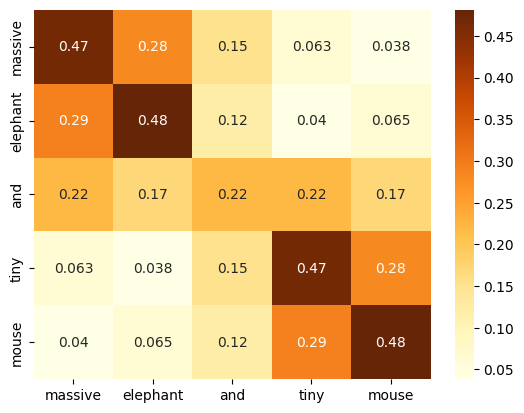

In [8]:
import seaborn as sns

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=-1, keepdims=True)

X = embeddings
Q = K = V = X

attention_scores = (Q @ K.T) / np.sqrt(K.shape[1])

attention_weights = softmax(attention_scores)

sns.heatmap(attention_weights, annot=True, xticklabels=words, yticklabels=words, cmap="YlOrBr")

<Axes: >

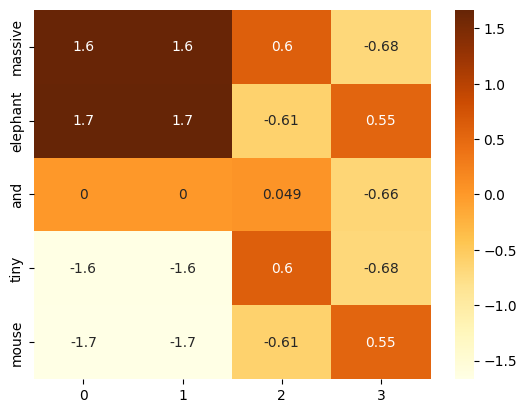

In [9]:
attention_outputs = attention_weights @ V
modified_embeddings = embeddings + attention_outputs
sns.heatmap(modified_embeddings, annot=True, yticklabels=words, cmap="YlOrBr")

### Task

In multi-head attention, inputs ($X$) are transformed by trainable weight matrices.

$$ Q = X W^Q \\ K = X W^K \\ V = X W^V$$

Modify the example above to use the $W^Q$/$W^K$/$W^V$ matrices below. Visualize the attention weights and outputs.

In [10]:
import numpy as np
W_q = np.array([[0, 0],
                [0, 0],
                [1, 0],
                [0, 1]])
W_k = np.array([[0, 0],
                [0, 0],
                [-1, 0],
                [0, -1]])
W_v = np.array([[0, 0, 0, 0],
                [0, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 1, 0]])

<Axes: >

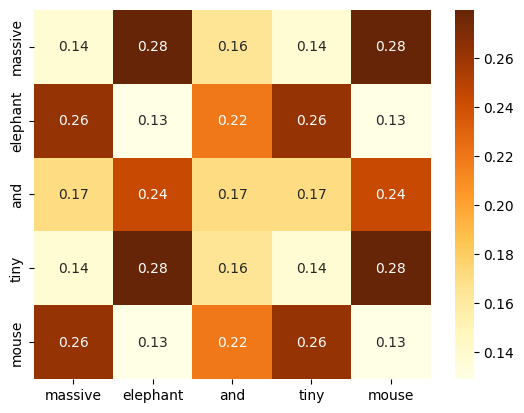

In [11]:

Q = X @ W_q
K = X @ W_k
V = X @ W_v

attention_scores = (Q @ K.T) / np.sqrt(K.shape[1])

attention_weights = softmax(attention_scores)

sns.heatmap(attention_weights, annot=True, xticklabels=words, yticklabels=words, cmap="YlOrBr")

<Axes: >

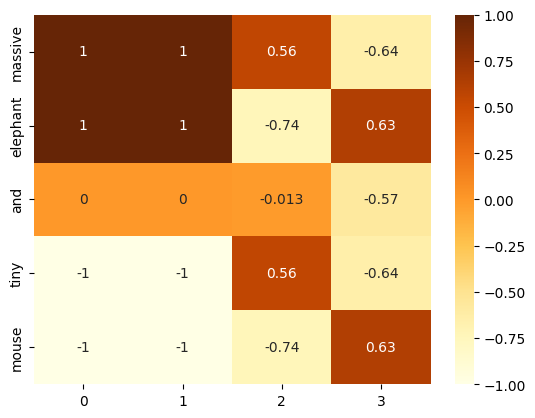

In [12]:
attention_outputs = attention_weights @ V
modified_embeddings = embeddings + attention_outputs
sns.heatmap(modified_embeddings, annot=True, yticklabels=words, cmap="YlOrBr")